In [1]:
import pymc3 as pm
import pandas as pd
import numpy as np

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\dcsbhr\AppData\Local\Continuum\anaconda3\envs\edward_env\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
data = pd.read_excel('./data/Book.xlsx')

In [3]:
mins = []
for r in range(len(data)):
    mins.append(data.iloc[r]['time']//600) 
    
data['minute'] = mins

              time    V(vref)  Temperature  pH  minute
0         0.000000   5.790837           15   7     0.0
1       229.001459   5.791682           15   7     0.0
2       459.000006   5.792004           15   7     0.0
3       688.664300   5.792239           15   7     1.0
4       910.053687   5.792425           15   7     1.0
5      1139.001983   5.792590           15   7     1.0
6      1369.000011   5.792736           15   7     2.0
7      1599.000000   5.792868           15   7     2.0
8      1820.161061   5.792984           15   7     3.0
9      2049.003032   5.793096           15   7     3.0
10     2279.000021   5.793200           15   7     3.0
11     2509.000000   5.793298           15   7     4.0
12     2730.375810   5.793387           15   7     4.0
13     2959.005129   5.793475           15   7     4.0
14     3189.000042   5.793558           15   7     5.0
15     3419.000000   5.793638           15   7     5.0
16     3640.805306   5.793712           15   7     6.0
17     386

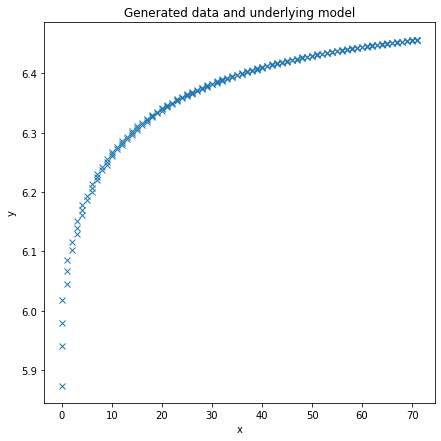

In [4]:
print(data)
x = data[data['Temperature'] == 40]['minute']
y = data[data['Temperature'] == 40]['V(vref)']
temp = np.array(data['Temperature'])
time = np.array(data['minute'])
#y = data[data[]]
#fig = plt.figure(figsize=(7, 7))
#ax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Generated data and underlying model')
#ax.plot(data['time'], data['V(vref)'], 'x', label='sampled data')
#ax.plot(x, true_regression_line, label='true regression line', lw=2.)
#plt.legend(loc=0);
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111,  xlabel='x', ylabel='y', title='Generated data and underlying model')
ax.plot(x, y, 'x', label='sampled data')

In [40]:
model_isfet = pm.Model()
'''
with model_isfet:
    mu_a = pm.Uniform('mu_a',0,20)
    sd_a = pm.Uniform('sd_a',0,20)
    mu_b = pm.Uniform('mu_b',0,20)
    sd_b = pm.Uniform('sd_b',0,20)
    alpha = pm.Normal('alpha', mu=mu_a, sigma=sd_a)
    beta = pm.Normal('beta', mu=mu_b, sigma=sd_b)
    epsilon = pm.Uniform('epsilon', 0,20)
    sd_vref = pm.Uniform('vref_sd', 0,1)
    voltage = pm.Normal('Voltage',mu=alpha*temp + beta*time + epsilon, sigma=sd_vref,observed=y)
    trace = sample(3000, cores=2)
'''
with model_isfet:
    alpha = pm.Uniform('alpha',0,50)
    beta = pm.Uniform('beta',0,50)
    epsilon = pm.Uniform('epsilon', 0,20)
    sd_vref = pm.Uniform('vref_sd', 0,1)
    voltage = pm.Normal('Voltage',mu= 20-np.exp(-alpha-beta*x), sigma=sd_vref,observed=y)
    step = pm.Metropolis()
    trace = pm.sample(3000, step=step)    

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [vref_sd]
>Metropolis: [epsilon]
>Metropolis: [beta]
>Metropolis: [alpha]
Sampling 4 chains: 100%|███████████████████████████████████████████████████████| 14000/14000 [02:18<00:00, 27.41draws/s]
The number of effective samples is smaller than 25% for some parameters.


C:\Users\dcsbhr\AppData\Local\Continuum\anaconda3\envs\edward_env\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
C:\Users\dcsbhr\AppData\Local\Continuum\anaconda3\envs\edward_env\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  del sys.path[0]


"\n%matplotlib inline\n\nfrom pymc3 import  *\n\nimport numpy as np\nimport matplotlib.pyplot as plt\n\nsize = 200\ntrue_intercept = 1\ntrue_slope = 2\n\nx = np.linspace(0, 1, size)\n# y = a + b*x\ntrue_regression_line = true_intercept + true_slope * x\n# add noise\ny = true_regression_line + np.random.normal(scale=.5, size=size)\n\ndata = dict(x=x, y=y)\n\nfig = plt.figure(figsize=(7, 7))\nax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Generated data and underlying model')\nax.plot(x, y, 'x', label='sampled data')\nax.plot(x, true_regression_line, label='true regression line', lw=2.)\nplt.legend(loc=0);\n"

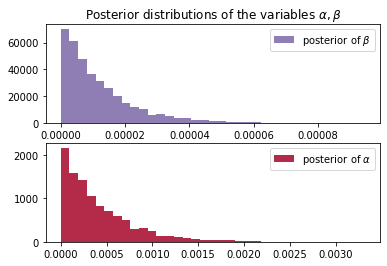

In [41]:
alpha_samples = trace["alpha"][1000:, None]  # best to make them 1d
beta_samples = trace["beta"][1000:, None]

#histogram of the samples:
plt.subplot(211)
plt.title(r"Posterior distributions of the variables $\alpha, \beta$")
plt.hist(beta_samples, histtype='stepfilled', bins=35, alpha=0.85,
         label=r"posterior of $\beta$", color="#7A68A6", normed=True)
plt.legend()

plt.subplot(212)
plt.hist(alpha_samples, histtype='stepfilled', bins=35, alpha=0.85,
         label=r"posterior of $\alpha$", color="#A60628", normed=True)
plt.legend();
'''
%matplotlib inline

from pymc3 import  *

import numpy as np
import matplotlib.pyplot as plt

size = 200
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + np.random.normal(scale=.5, size=size)

data = dict(x=x, y=y)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Generated data and underlying model')
ax.plot(x, y, 'x', label='sampled data')
ax.plot(x, true_regression_line, label='true regression line', lw=2.)
plt.legend(loc=0);
'''

In [42]:
alpha_mean = alpha_samples.mean()
beta_mean = beta_samples.mean()

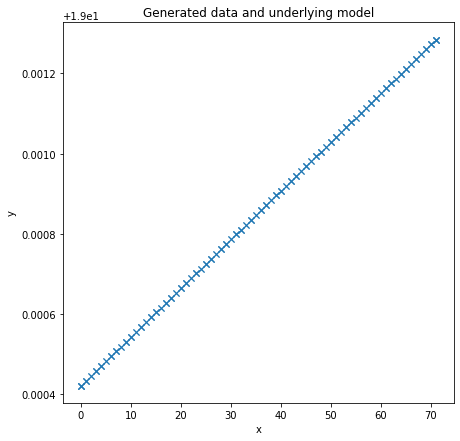

In [43]:
fig = plt.figure(figsize=(7, 7))
y_pred = 20-np.exp(-alpha_mean - beta_mean*x)
ax = fig.add_subplot(111,  xlabel='x', ylabel='y', title='Generated data and underlying model')
ax.plot(x, y_pred, 'x', label='sampled data')